# ***---------------THERA BANK - Personal Loans Conversion Analysis-----------------***

# **PROBLEM STATEMENT**

To predict the likelihood of a liability customer buying
 personal loans (while retaining them as depositors).


# **CONTEXT**



*   Last year a campaign ran by the bank for the liability customers to convert them to personal loan holders, showed a healthy conversion rate of over 9.6% success.

*   Analysis done on previous year’s campaign data to devise a campaign model to target customers in a better way to increase the success ratio with a minimal budget.



# **DATASET**

We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Last year campaign was conducted on 5000 liability customers. So, there are 5000 rows which can be split into test & train datasets.


Description of the variables


· ID: Customer ID


· Age: Customer’s age in completed years


· Experience: #years of professional experience


· Income: Annual income of the customer ($000)


· ZIP Code: Home Address ZIP code.


· Family: the Family size of the customer


· CCAvg: Avg. spending on credit cards per month ($000)


· Education: Education Level. 1: Advanced/Professional, 2: Graduate, 3: Undergrad

· Mortgage: Value of house mortgage if any. ($000)


· Personal Loan: Did this customer accept the personal loan offered in the last campaign?


· Securities Account: Does the customer have securities account with the bank?


· CD Account: Does the customer have a certificate of deposit (CD) account with the bank?


· Online: Do customers use internet banking facilities?


· Credit card: Does the customer use a credit card issued by UniversalBank?

# **TECHNIQUES/MODELS USED**


1.   Logistic Regression
2.   Random Forest Classifier
3.   SMOTE Technique



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading the Dataset**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
loan_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# **Exploratory Data Analysis**

## **Detailed Information of the Dataset**

In [ ]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loan_data.shape

(5000, 14)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## **Checking for Missing Value**

In [ ]:
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## **SUMMARY**

In [ ]:
loan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## **Data Analysis**

In [ ]:
edu_exp = loan_data.groupby("Education").Experience.mean().sort_values(ascending=True)
edu_exp

Education
2    19.770492
1    20.065363
3    20.471686
Name: Experience, dtype: float64

In [ ]:
age_exp = loan_data.groupby('Age')['Experience'].mean().sort_values(ascending=False).reset_index()
age_exp

,Age,Experience
0,67,41.833333
1,66,40.875000
2,65,39.812500
3,64,38.846154
4,63,37.638889
5,62,36.829268
6,61,35.672131
7,60,34.645669
8,59,34.000000
9,58,32.559441


Text(0.5, 1.0, 'Average of Experience by Age')

<Figure size 720x504 with 0 Axes>

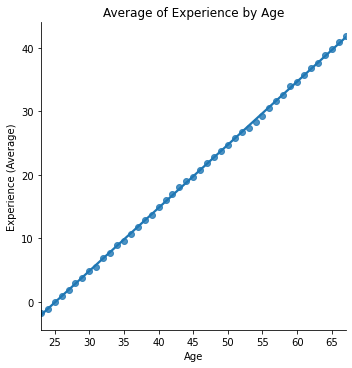

In [ ]:
plt.figure(figsize=(10,7))
sns.lmplot(x="Age", y="Experience", data=age_exp)
plt.ylabel("Experience (Average)")
plt.title("Average of Experience by Age")

**Removing Data Inconsistency in Experience Variable**

In [ ]:
loan_data.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
loan_data[loan_data["Experience"]<0][["Age","Experience"]]

,Age,Experience
89,25,-1
226,24,-1
315,24,-2
451,28,-2
524,24,-1
536,25,-1
540,25,-1
576,25,-1
583,24,-1
597,24,-2


In [ ]:
neg_age_exp = loan_data[loan_data["Experience"]<0][["Age","Experience"]]
neg_age_exp.Age.unique()

array([25, 24, 28, 23, 29, 26])

In [ ]:
loan_data["Experience"] = loan_data["Experience"].abs()
loan_data[loan_data["Experience"]<0][["Age","Experience"]]

,Age,Experience


In [ ]:
summ = loan_data.describe()
pd.DataFrame(summ, columns=summ.columns).transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### **Feature Correlation Analysis**

**Heatmap correlation**

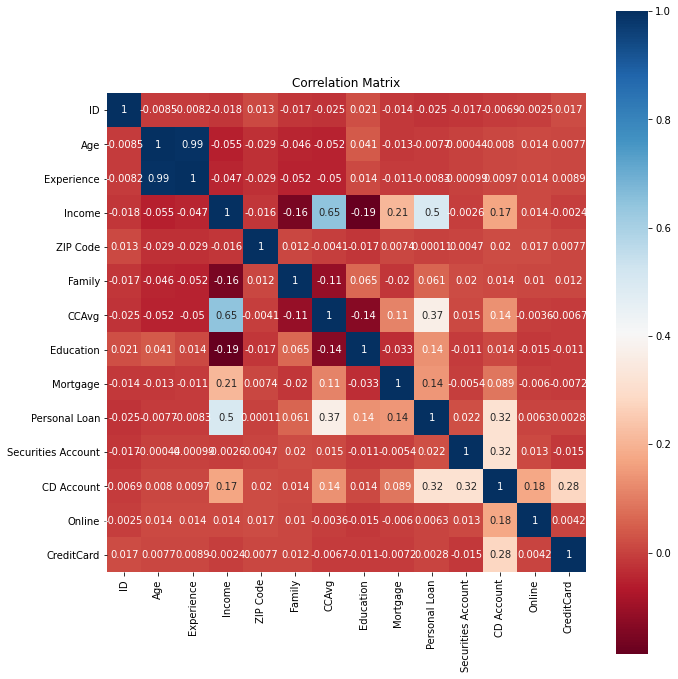

In [ ]:
corr = loan_data.corr()
plt.subplots(figsize=(10,10));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()

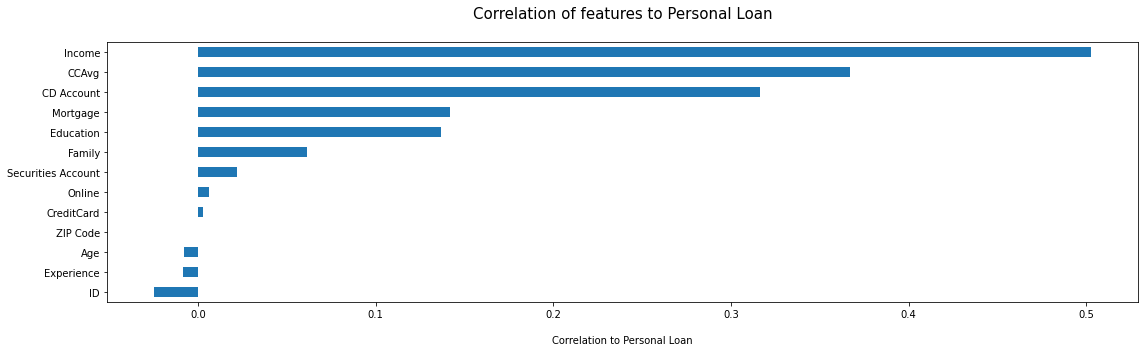

In [ ]:
plt.figure(figsize=(16,5))
corr["Personal Loan"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of features to Personal Loan\n", fontsize=15)
plt.xlabel("\nCorrelation to Personal Loan")
plt.tight_layout()
plt.show()

***ANALYSIS***

1. The feature Income and CCAvg (Average Credit Card Spending) is the most correlated feature with the dependent variable Personal Loan.
2. ZIP Code has no correlation with the dependent variable, and Credit Card and Online feature also has very less correlation with the Personal Loan.
3. Age and Experience feature has extremely high correlation of 0.99 with each other. Since with it is inevitable, that with age, experience also increases and vice-versa. So if we take both the variables we will get high Multicollinearity. Hence we can drop any one of them.
4. Income and CCAvg also have moderately high correlation of 0.65.

## **UNIVARIATE ANALYSIS**

### **Feature Distribution Analysis**

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

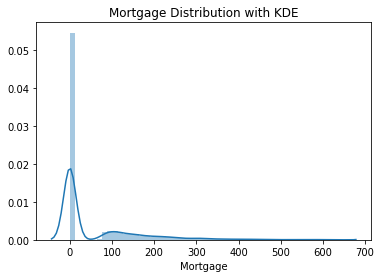

In [ ]:
sns.distplot(loan_data["Mortgage"])
plt.title("Mortgage Distribution with KDE")

The feature Mortgage is extremely positive skewed data. Since maximum number of customers have no or very little mortgage. So we can see a huge spike around zero mortgage value. The distribution need to be log transformed to make it more like a normal distribution, to avoid any type of distortion in the output.

**FIRST LOG TRANFORMATION OF MORTGAGE**

Text(0.5, 1.0, 'Mortgage Distribution after First Log Transformation')

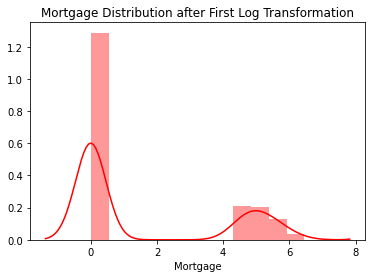

In [ ]:
SingleLog_y = np.log1p(loan_data["Mortgage"])
sns.distplot(SingleLog_y, color ="r")
plt.title("Mortgage Distribution after First Log Transformation")

**SECOND LOG TRANFORMATION OF MORTGAGE**

Text(0.5, 1.0, 'Mortgage Distribution after Second Transformation')

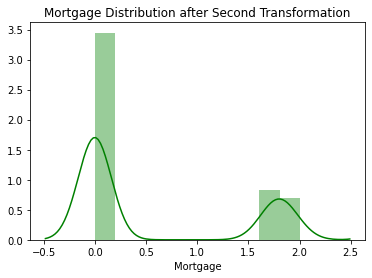

In [ ]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="g")
plt.title("Mortgage Distribution after Second Transformation")

In [ ]:
loan_data["Mortgage"] = DoubleLog_y

***ANALYSIS***

After the first Log transformation, further improvement can be seen in the second Log transformation. So, second Log transformation can be considered for further analysis.

Text(0.5, 1.0, 'Distribution of Experience')

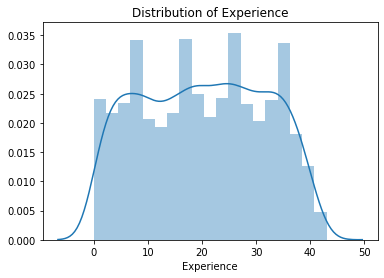

In [ ]:
sns.distplot(loan_data['Experience'])
plt.title("Distribution of Experience")

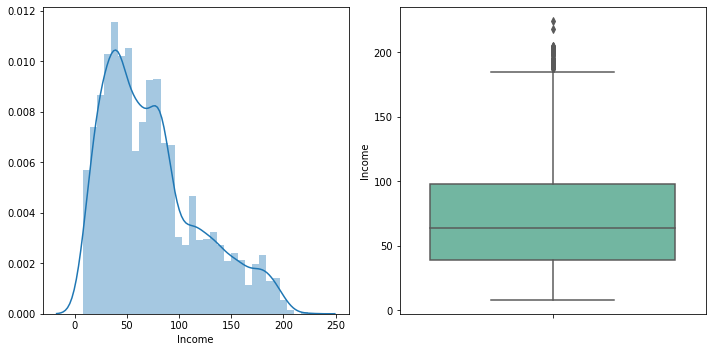

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(loan_data['Income'], ax=axes[0])
sns.boxplot(loan_data['Income'], orient="v", palette="Set2", ax=axes[1])
plt.tight_layout()

Text(0.5, 1.0, 'Income Distribution after Log Transformation')

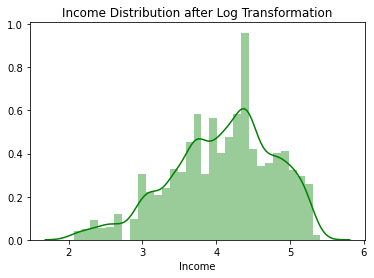

In [ ]:
income_log = np.log(loan_data["Income"])
sns.distplot(income_log, color ="g")
plt.title("Income Distribution after Log Transformation")

Text(0.5, 1.0, 'Income Distribution after Second Log Transformation')

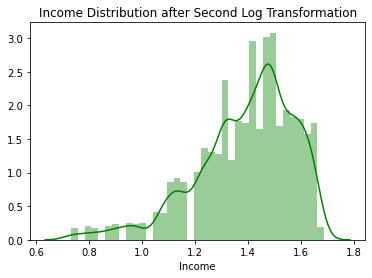

In [ ]:
income_2nd_log = np.log(income_log)
sns.distplot(income_2nd_log, color ="g")
plt.title("Income Distribution after Second Log Transformation")

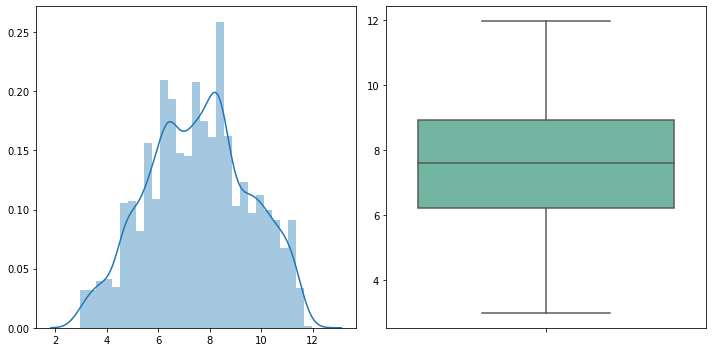

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(loan_data["Income"].values.reshape(-1, 1))

temp_income = pt.transform(loan_data["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(temp_income, ax=axes[0])
sns.boxplot(temp_income, orient="v", palette="Set2", ax=axes[1])
plt.tight_layout()

In [ ]:
loan_data['Income'] = temp_income

***ANALYSIS***

The distribution of Income feature is also right skewed. So, at first tried to normalize the distribution with Log transformation. But didn't got satisfactory result and the data got negatively skewed. To obtain a normal distribution for the given variable, Power Transformation has been implemented, and we got a better result. We can also observe that in the box plot distribution that before there was some outliers present, but after Power Transformation there are no outliers present in the distribution.

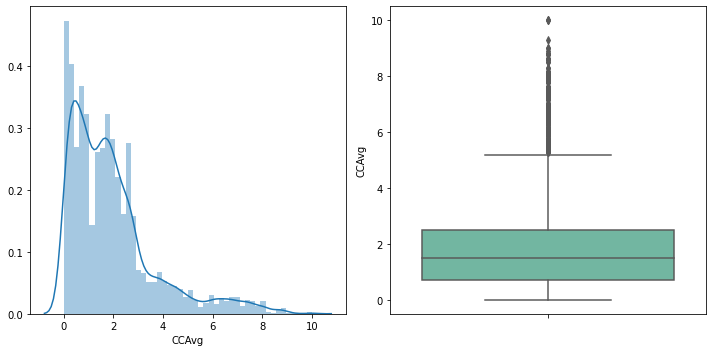

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(loan_data['CCAvg'], ax=axes[0])
sns.boxplot(loan_data['CCAvg'], orient="v", palette="Set2", ax=axes[1])
plt.tight_layout()

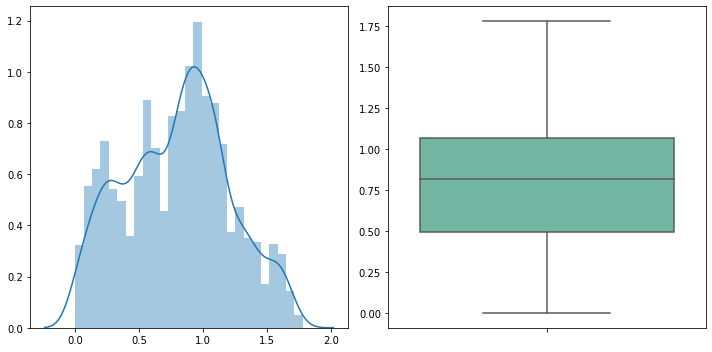

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(loan_data["CCAvg"].values.reshape(-1, 1))

temp_ccavg = pt.transform(loan_data["CCAvg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(temp_ccavg, ax=axes[0])
sns.boxplot(temp_ccavg, orient="v", palette="Set2", ax=axes[1])
plt.tight_layout()

In [ ]:
loan_data['CCAvg'] = temp_ccavg

***ANALYSIS***

Similarly, the CCAvg attribute also has a right skewed distribution. So, to make it like a normal distribution, Power Transformation has been implemented on the values. After transformation we got rid of the outliers from the distribution. 

Text(0.5, 1.0, 'Distribution of Education')

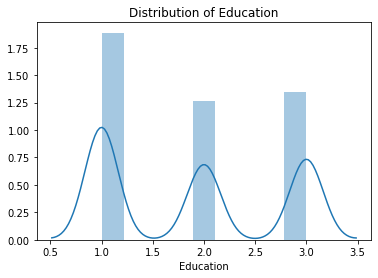

In [ ]:
sns.distplot(loan_data['Education'])
plt.title("Distribution of Education")

In [ ]:
loan_data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

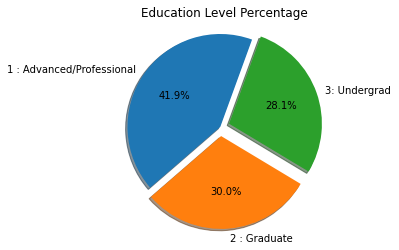

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.10, 0.10)
ax1.pie(loan_data["Education"].value_counts(), explode=explode, labels=["1 : Advanced/Professional", "2 : Graduate", "3: Undergrad"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Education Level Percentage")
plt.show()

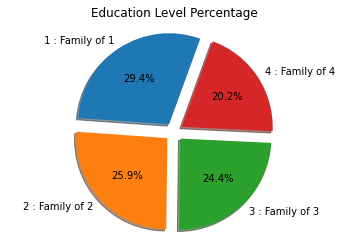

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0.10, 0.10, 0.10, 0.10)
ax1.pie(loan_data["Family"].value_counts(), explode=explode, labels=["1 : Family of 1", "2 : Family of 2", "3 : Family of 3", "4 : Family of 4"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Education Level Percentage")
plt.show()

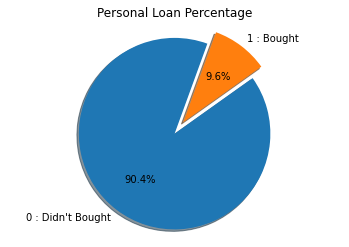

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_data["Personal Loan"].value_counts(), explode=explode, labels=["0 : Didn't Bought", "1 : Bought"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

***ANALYSIS***

Out of the 5000 customers only 480 customers bought the personal loan in the last campaign i.e. 9.6% which has been plotted in the pie chart. So we have a imbalanced data in our hand. If required we can apply SMOTE analysis on the dataset to make it balanced data.

## **BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Income Distribution')

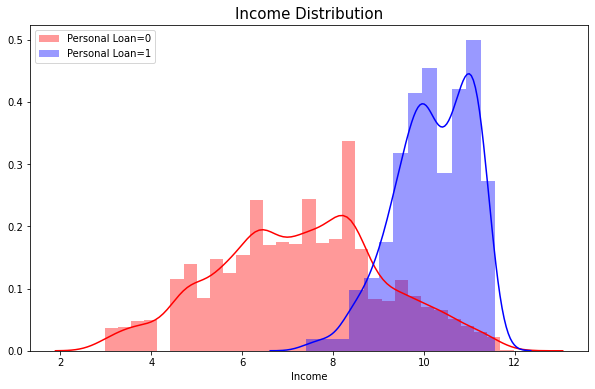

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Income Distribution", fontsize=15)

***ANALYSIS***

The person who have opted for the personal loan belongs to the higher income bracket, whereas most of the customers who didn't bought the loan earns less.

Text(0.5, 1.0, 'CCAvg Distribution')

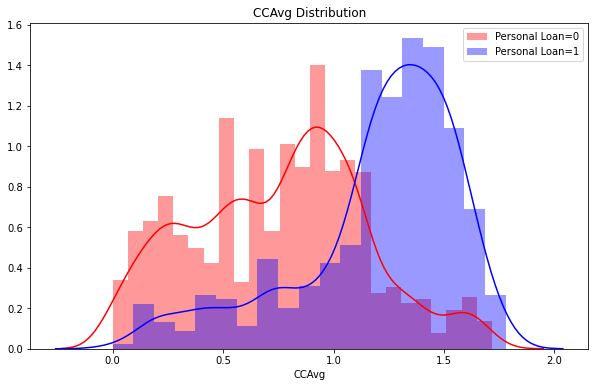

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("CCAvg Distribution")

***ANALYSIS***

From the distribution we can see that the customers who bought personal loan spents more in credit card. While the spread is almost same for both the classes of customers.

Text(0.5, 1.0, 'Age Distribution')

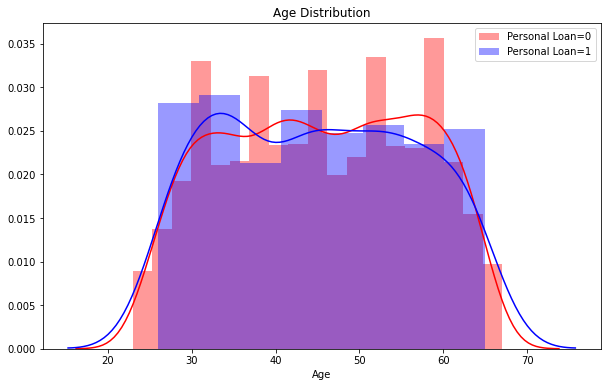

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['Age'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Age Distribution")

Text(0.5, 1.0, 'Experience Distribution')

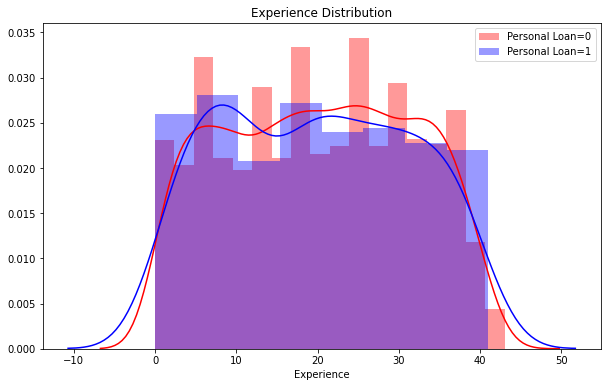

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(loan_data[loan_data["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(loan_data[loan_data["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Experience Distribution")

***ANALYSIS***

The distribution of age and experience is same for both the class 0 and 1. So, we can infer that age or experience might not have that much effect on the decision of buying a personal loan.

Text(0, 0.5, 'Count')

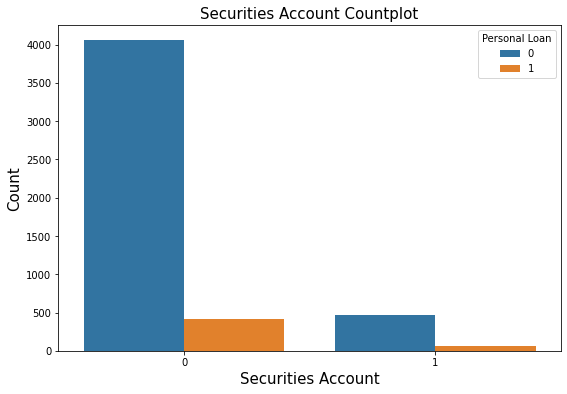

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Securities Account", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Securities Account Countplot', fontsize=15)
plt.xlabel('Securities Account', fontsize=15)
plt.ylabel('Count', fontsize=15)

***ANALYSIS***

Almost 4500 of the customers don't have any security account. And both the case of Personal Loan is high for the customers with no security account.

Text(0, 0.5, 'Count')

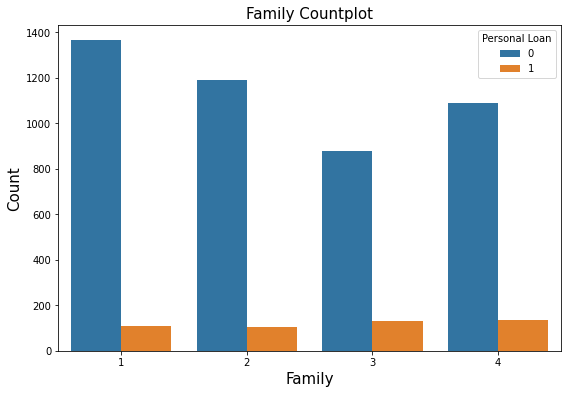

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Family", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Family Countplot', fontsize=15)
plt.xlabel('Family', fontsize=15)
plt.ylabel('Count', fontsize=15)

***ANALYSIS***

Maximum customers belongs to the family size of 1. And the persons who didn't accepted the Personal Loan offer belongs to family size of 1 followed by 2. The reason might be that, their expense is less than other categories of customers. Whereas out of the customers who have bought the personal loan, maximum have a family of size 3 and 4.

Text(0, 0.5, 'Count')

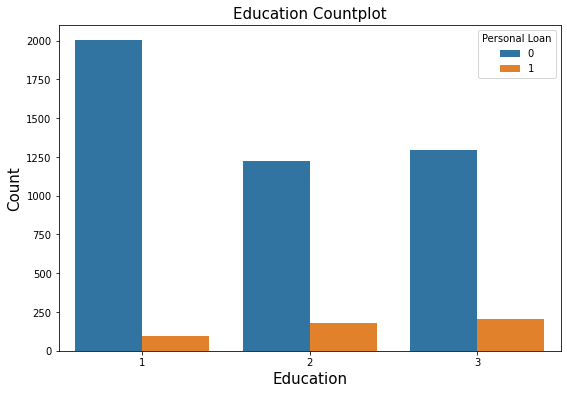

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Education", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Education Countplot', fontsize=15)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)

***ANALYSIS***

42% of the candidates are Graduate, while 30% are professional and 28% are Undergraduate. Customers with high educational qualification are less likely to buy personal loan. As they should have a high income. But customers who are not that highly qualified are more prone to buy personal loan.

Text(0, 0.5, 'Count')

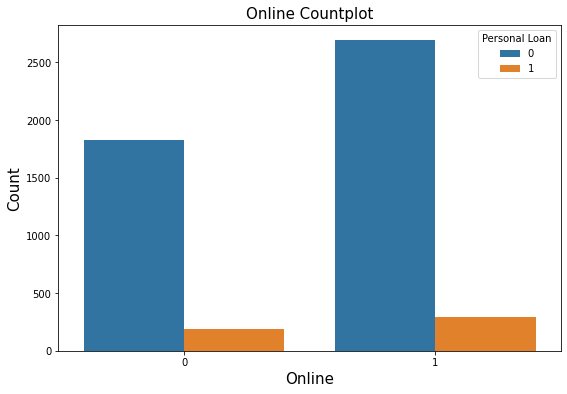

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="Online", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('Online Countplot', fontsize=15)
plt.xlabel('Online', fontsize=15)
plt.ylabel('Count', fontsize=15)

***ANALYSIS***

Most of the customers has internet banking facity and the ones who have the facility have bought more number of personal loans.

Text(0, 0.5, 'Count')

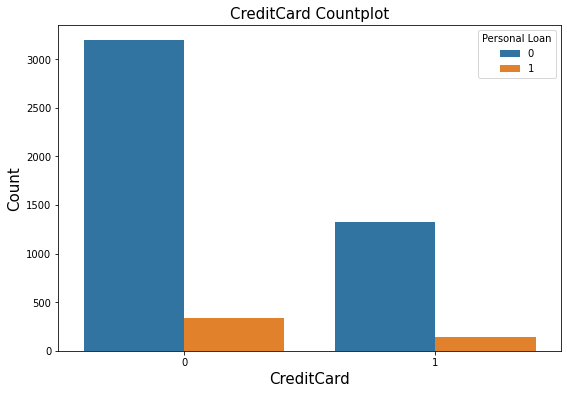

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="CreditCard", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('CreditCard Countplot', fontsize=15)
plt.xlabel('CreditCard', fontsize=15)
plt.ylabel('Count', fontsize=15)

***ANALYSIS***

Maximum of the customers don't own a credit card. And the maximum number of customers who bought personal loan falls in this category, as they don't have the privilage to buy anything on credit using credit card. So they are more likely to buy things with personal loan.

Text(0, 0.5, 'Count')

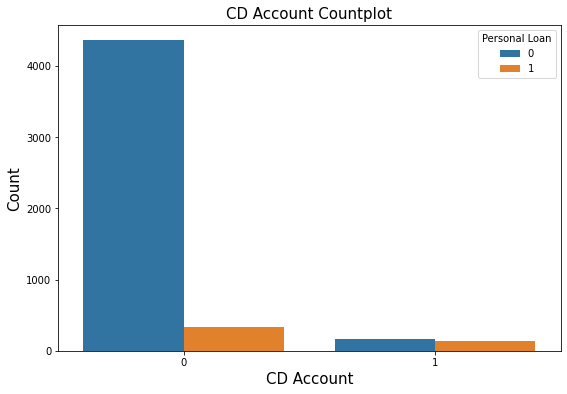

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x="CD Account", hue="Personal Loan", data=loan_data)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.title('CD Account Countplot', fontsize=15)
plt.xlabel('CD Account', fontsize=15)
plt.ylabel('Count', fontsize=15)

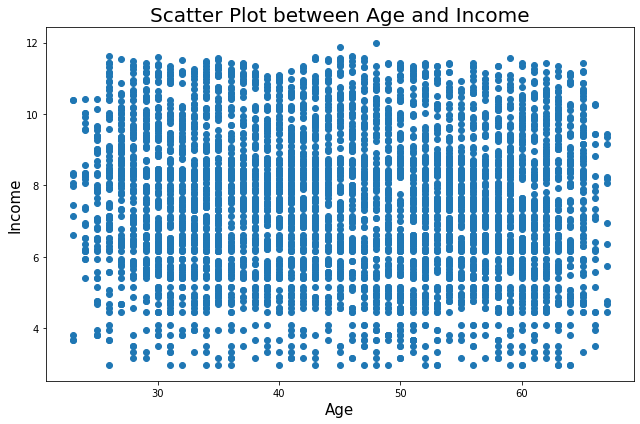

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Age"], y=loan_data["Income"])
plt.title("Scatter Plot between Age and Income", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

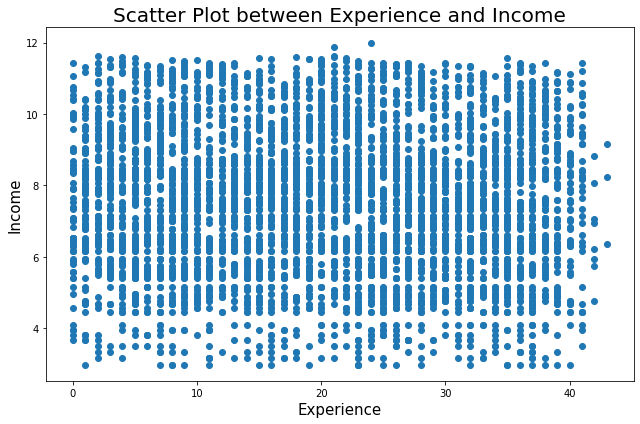

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Experience"], y=loan_data["Income"])
plt.title("Scatter Plot between Experience and Income", fontsize=20)
plt.xlabel("Experience", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

***ANALYSIS***

Since Age and Experience is highly correlated with each other, so their scatter plot with income is also almost identical. There is no pattern as such in the scatter plot.

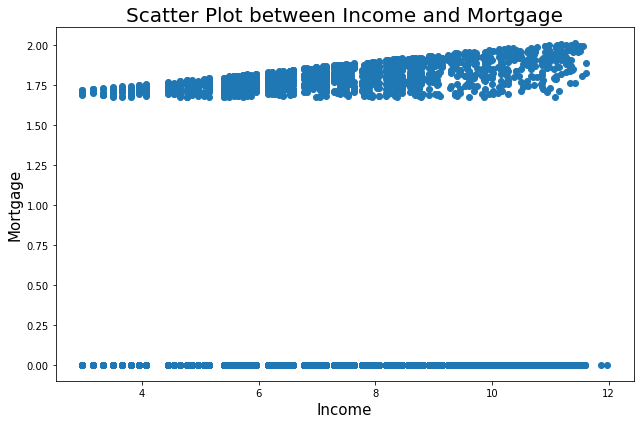

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Income"], y=loan_data["Mortgage"])
plt.title("Scatter Plot between Income and Mortgage", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Mortgage", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

***ANALYSIS***

Many of the customers don't have any mortgage in their name. So we can observe a line along the mortgage value zero. And the mortgage value for the customers increases with increase in their income.

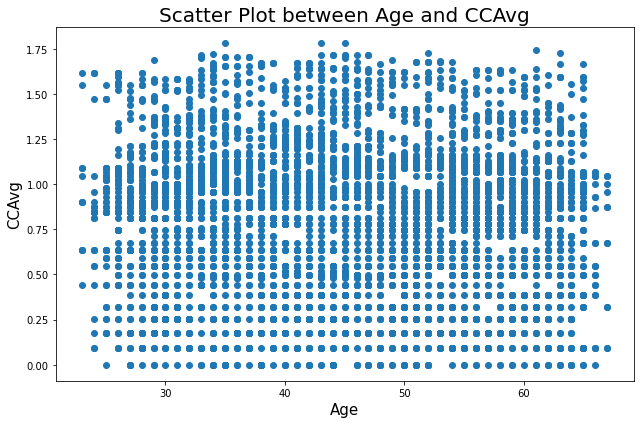

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Age"], y=loan_data["CCAvg"])
plt.title("Scatter Plot between Age and CCAvg", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("CCAvg", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

***ANALYSIS***

There is no specific pattern in the scatter plot between Age and Average Credit Card spending. CCAvg doesnot depend on the age of a customer.

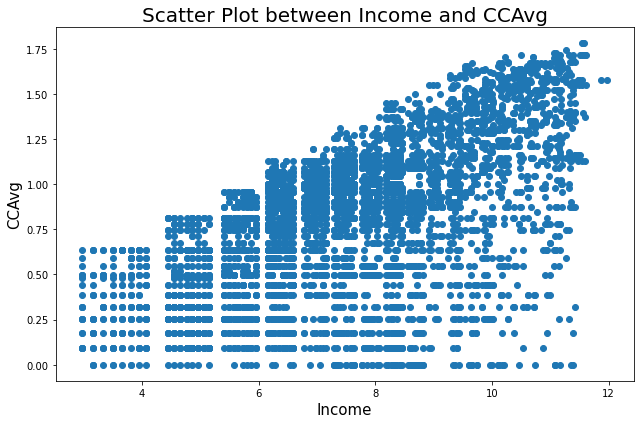

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["Income"], y=loan_data["CCAvg"])
plt.title("Scatter Plot between Income and CCAvg", fontsize=20)
plt.xlabel("Income", fontsize=15)
plt.ylabel("CCAvg", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

***ANALYSIS***

We can see a clear increasing trend in the average credit card spending with the income of the customer. Customers with high income are more likely to have high credit card spending and more likely to buy Personal Loan as seen earlier.

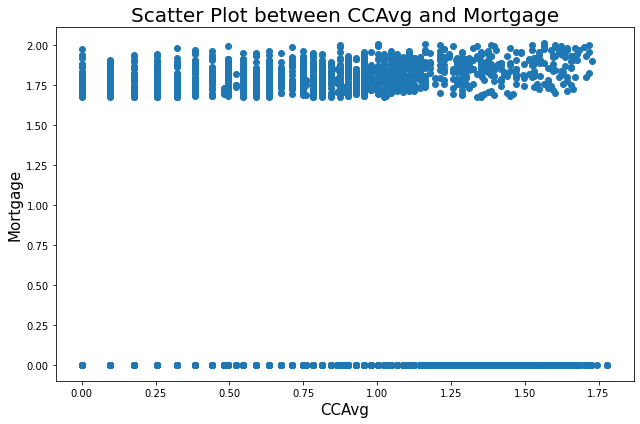

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x=loan_data["CCAvg"], y=loan_data["Mortgage"])
plt.title("Scatter Plot between CCAvg and Mortgage", fontsize=20)
plt.xlabel("CCAvg", fontsize=15)
plt.ylabel("Mortgage", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.yticks(horizontalalignment='right')
plt.tight_layout()

***ANALYSIS***

The range of mortgage value is almost same for all the CCAvg value. But frequency of people having mortgage along with high CCAvg is more.

## **MULTIVARIATE ANALYSIS**

Text(0, 0.5, 'Income')

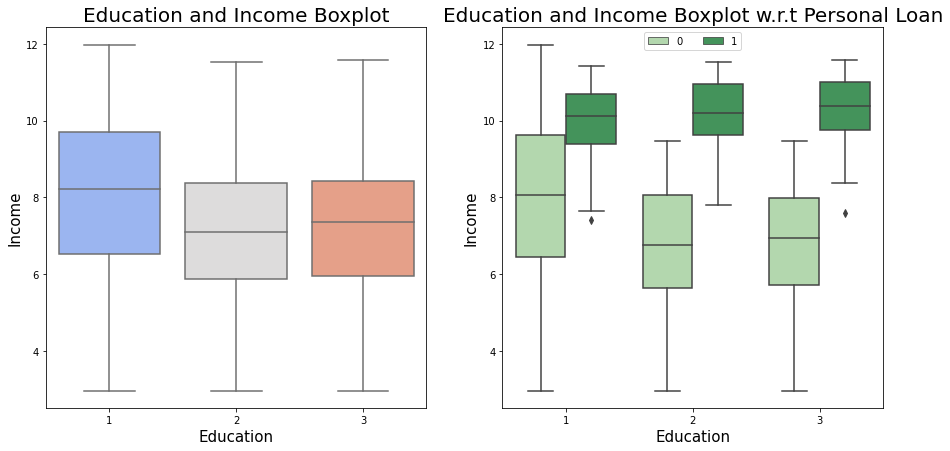

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Education',  y='Income', data=loan_data, palette="coolwarm")
ax.set_title("Education and Income Boxplot", fontsize=20)
ax.set_xlabel("Education", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Education',  y='Income', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Education and Income Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Education", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

***ANALYSIS***

From the boxplot it is clear that the customers with higher qualification earns more. The median income is also more for the highly educated customers. But the people who bought personal loan from all the three qualification category, has high salary compared to the oneswho didn't bought. Since, the one who earns more might spend more. And to upkeep their life style they are more inclined towards taking personal loan.

Text(0, 0.5, 'Income')

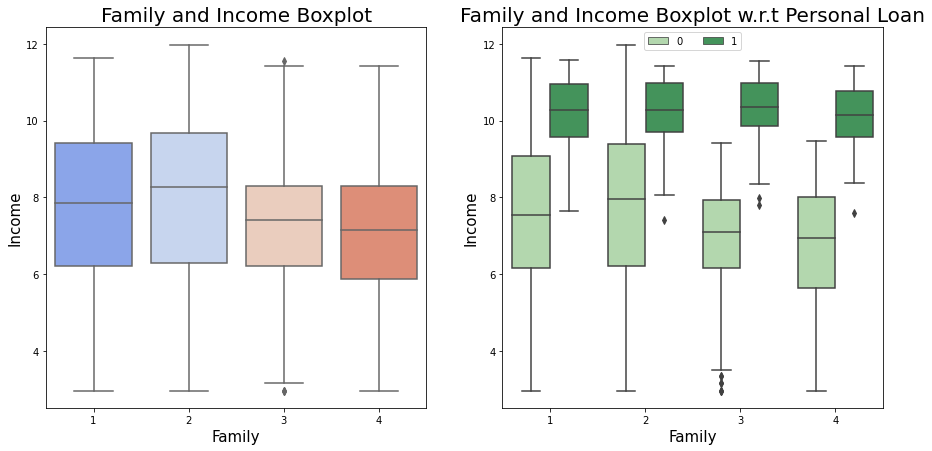

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Family',  y='Income', data=loan_data, palette="coolwarm")
ax.set_title("Family and Income Boxplot", fontsize=20)
ax.set_xlabel("Family", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Family',  y='Income', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Family and Income Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Family", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

***ANALYSIS***

Customers with family size of 1 and 2 earns much more than the other two category. As seen earlier also, all the customers who bought personal loan belongs to high income groups.

Text(0, 0.5, 'Income')

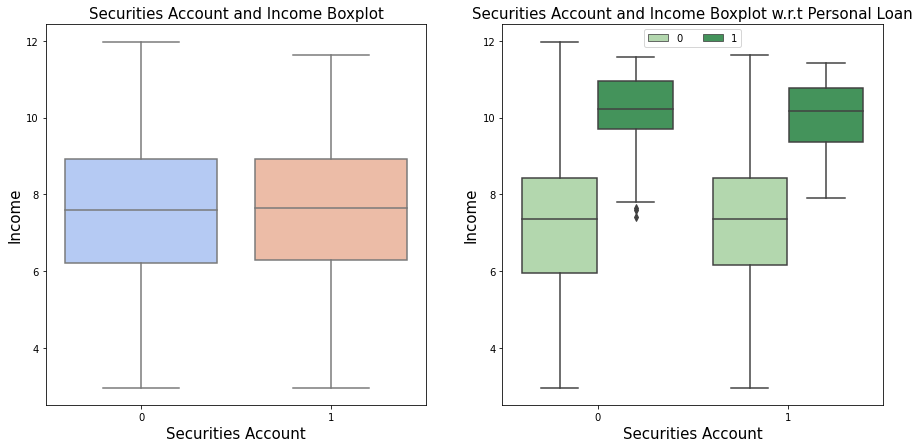

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Securities Account',  y='Income', data=loan_data, palette="coolwarm")
ax.set_title("Securities Account and Income Boxplot", fontsize=15)
ax.set_xlabel("Securities Account", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Securities Account',  y='Income', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Securities Account and Income Boxplot w.r.t Personal Loan", fontsize=15)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Securities Account", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

***ANALYSIS***

Owning a Security Account has almost no effect on Income of that customer.

Text(0, 0.5, 'Income')

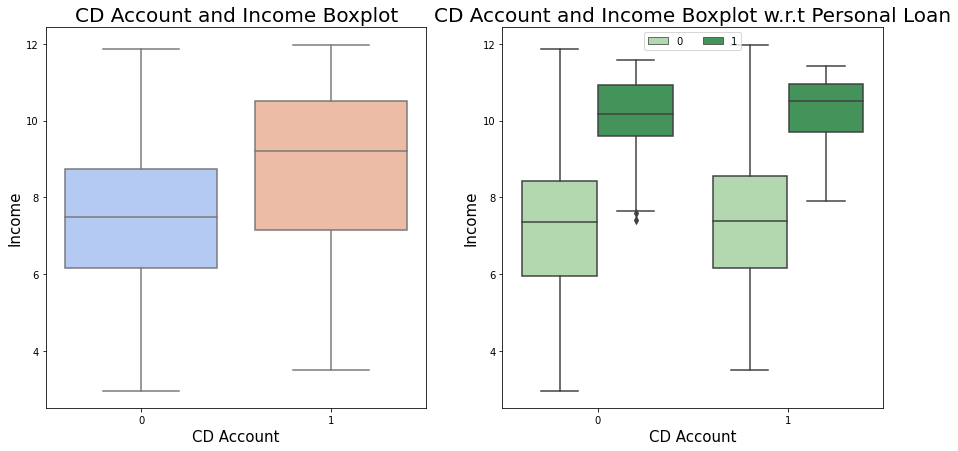

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CD Account',  y='Income', data=loan_data, palette="coolwarm")
ax.set_title("CD Account and Income Boxplot", fontsize=20)
ax.set_xlabel("CD Account", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CD Account',  y='Income', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("CD Account and Income Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CD Account", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

***ANALYSIS***

Customers with high income owns CD Account i.e. Certificate of Deposit. Also the median income for the persons who opted for Personal Loan is high for the customers who have CD Account with the bank.

Text(0, 0.5, 'Income')

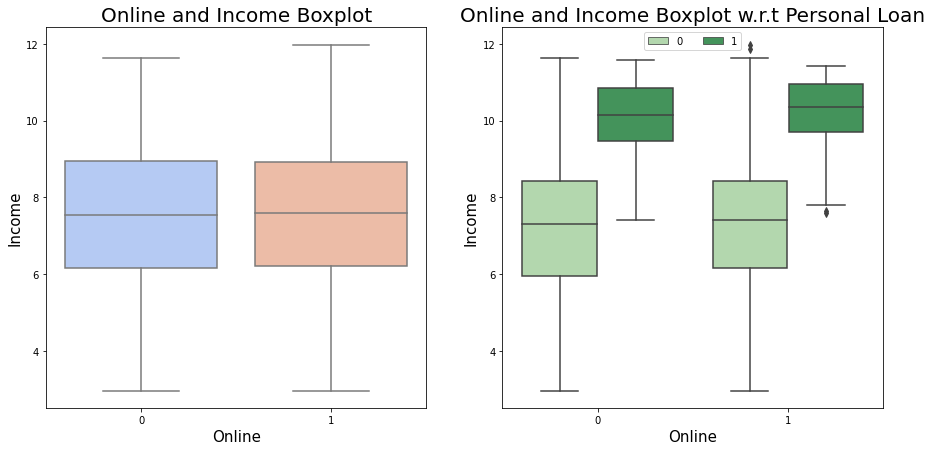

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Online',  y='Income', data=loan_data, palette="coolwarm")
ax.set_title("Online and Income Boxplot", fontsize=20)
ax.set_xlabel("Online", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Online',  y='Income', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Online and Income Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Online", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

Text(0, 0.5, 'Income')

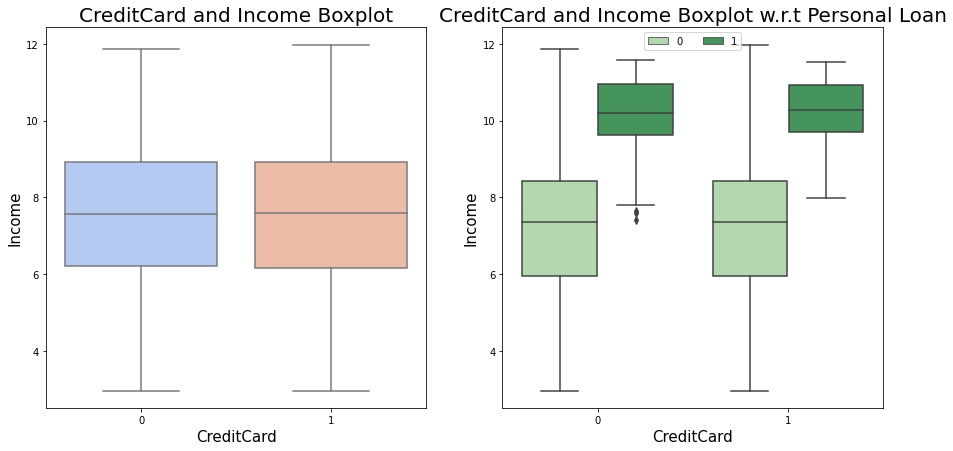

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CreditCard',  y='Income', data=loan_data, palette="coolwarm")
ax.set_title("CreditCard and Income Boxplot", fontsize=20)
ax.set_xlabel("CreditCard", fontsize=15)
ax.set_ylabel("Income", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CreditCard',  y='Income', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("CreditCard and Income Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CreditCard", fontsize=15)
ax1.set_ylabel("Income", fontsize=15)

***ANALYSIS***

Income doesnot vary with the factor of having a Credit Card or a Online Banking facility.

Text(0, 0.5, 'CCAvg')

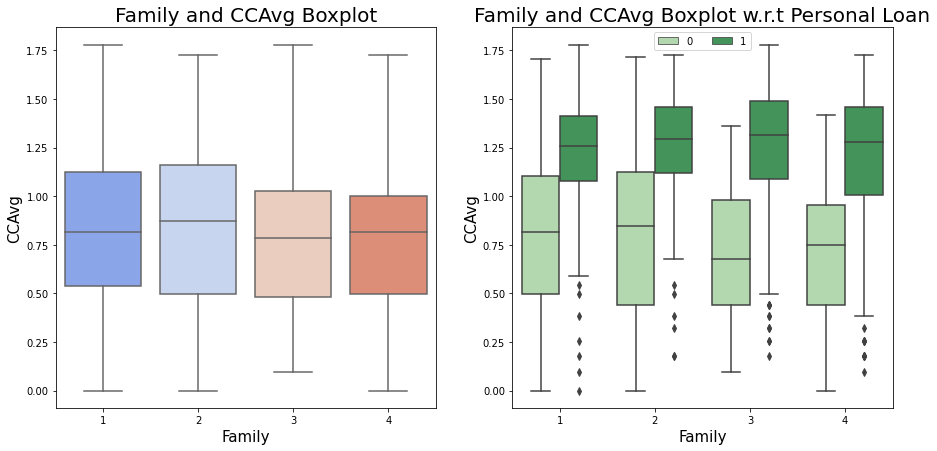

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Family',  y='CCAvg', data=loan_data, palette="coolwarm")
ax.set_title("Family and CCAvg Boxplot", fontsize=20)
ax.set_xlabel("Family", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Family',  y='CCAvg', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Family and CCAvg Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Family", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

***ANALYSIS***

The customers with family size of 2 has the highest CCAvg followed by family size of 1. Their liability might be less than the customers with bigger family size, for which they might spend more in credit card. But the median spending of family size 4 is quite high and the maximum and minimum spending for family with size 3 is higher than all the other groups.

The CCAvg value is high for all the customers who bought personal loan belonging to all the four categories. The median credit card spending is high for family of size 3. So, the customers who already have high credit card spending is more likely to buy personal loan to meet their needs.

Text(0, 0.5, 'CCAvg')

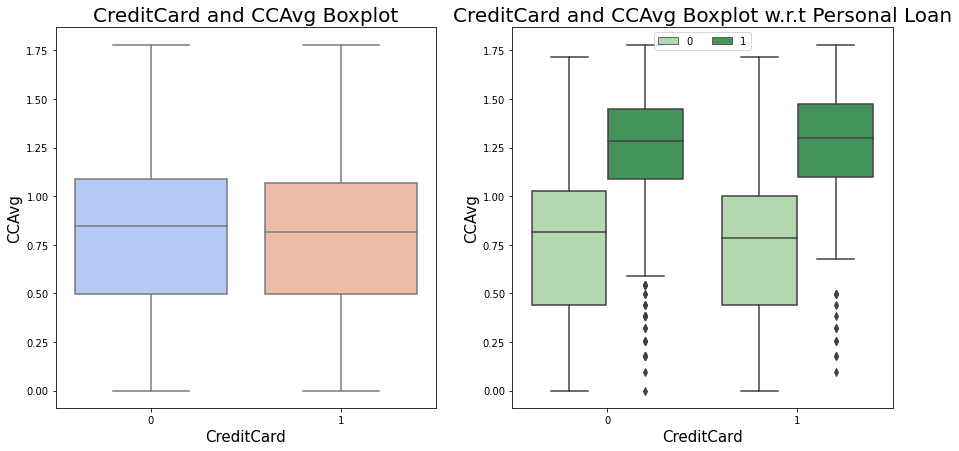

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CreditCard',  y='CCAvg', data=loan_data, palette="coolwarm")
ax.set_title("CreditCard and CCAvg Boxplot", fontsize=20)
ax.set_xlabel("CreditCard", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CreditCard',  y='CCAvg', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("CreditCard and CCAvg Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CreditCard", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

Text(0, 0.5, 'CCAvg')

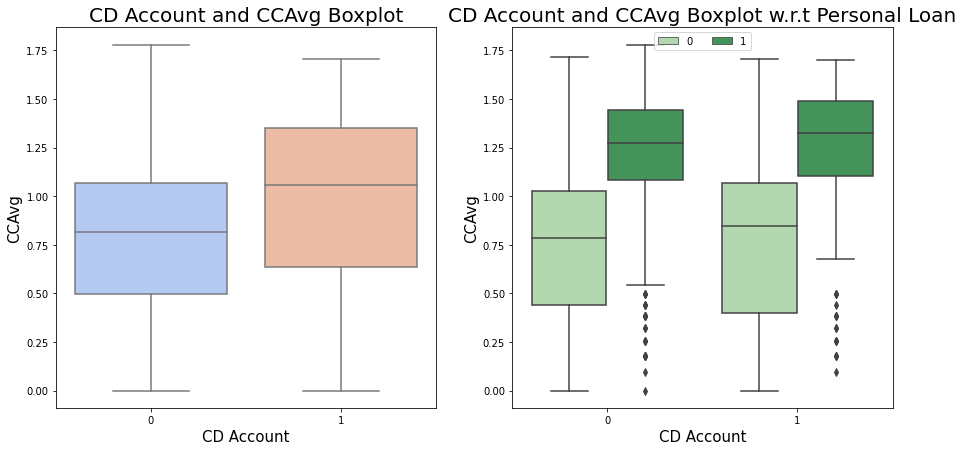

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='CD Account',  y='CCAvg', data=loan_data, palette="coolwarm")
ax.set_title("CD Account and CCAvg Boxplot", fontsize=20)
ax.set_xlabel("CD Account", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='CD Account',  y='CCAvg', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("CD Account and CCAvg Boxplot w.r.t Personal Loan", fontsize=20)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("CD Account", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

***ANALYSIS***

The customers who have CD account have high income and also have high credit card spending.

The customers who have CD Acoount as well as bought personal loan, their minimum and median CCAvg is higher than the one who don't have a CD Account.

Text(0, 0.5, 'CCAvg')

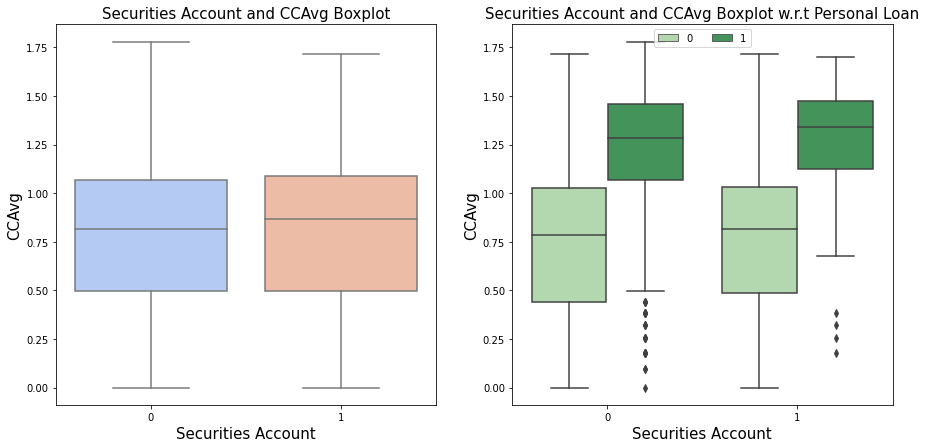

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Securities Account',  y='CCAvg', data=loan_data, palette="coolwarm")
ax.set_title("Securities Account and CCAvg Boxplot", fontsize=15)
ax.set_xlabel("Securities Account", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Securities Account',  y='CCAvg', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Securities Account and CCAvg Boxplot w.r.t Personal Loan", fontsize=15)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Securities Account", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

Text(0, 0.5, 'CCAvg')

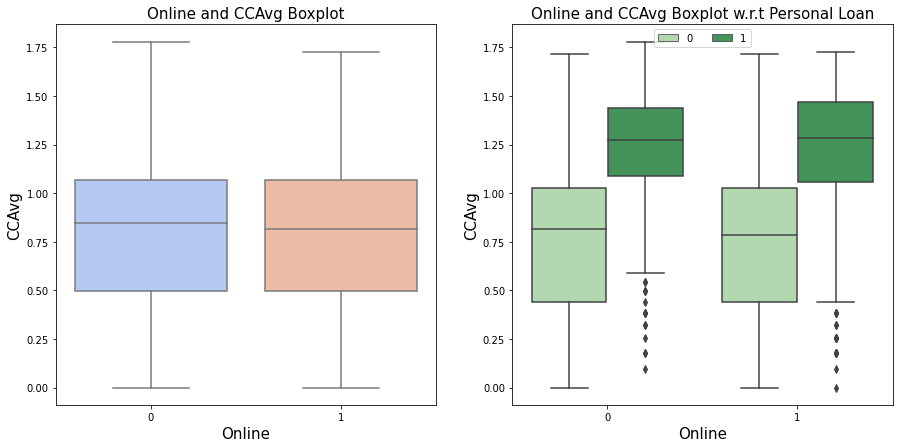

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Online',  y='CCAvg', data=loan_data, palette="coolwarm")
ax.set_title("Online and CCAvg Boxplot", fontsize=15)
ax.set_xlabel("Online", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Online',  y='CCAvg', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Online and CCAvg Boxplot w.r.t Personal Loan", fontsize=15)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Online", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

Text(0, 0.5, 'CCAvg')

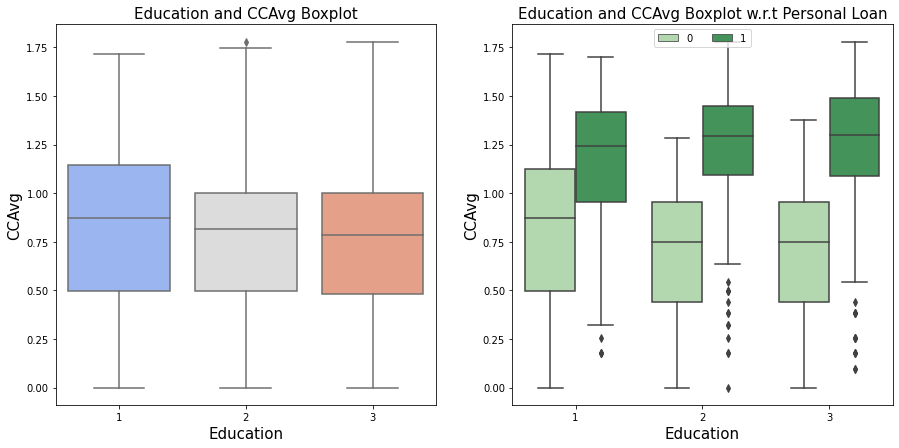

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.boxplot(x='Education',  y='CCAvg', data=loan_data, palette="coolwarm")
ax.set_title("Education and CCAvg Boxplot", fontsize=15)
ax.set_xlabel("Education", fontsize=15)
ax.set_ylabel("CCAvg", fontsize=15)

plt.subplot(1,2,2)
ax1 = sns.boxplot(x='Education',  y='CCAvg', hue='Personal Loan', data=loan_data, palette="Greens")
ax1.set_title("Education and CCAvg Boxplot w.r.t Personal Loan", fontsize=15)
plt.legend(loc='upper center', ncol=2)
ax1.set_xlabel("Education", fontsize=15)
ax1.set_ylabel("CCAvg", fontsize=15)

***ANALYSIS***

The customers with high eduction qualification has high CCAvg value than the other two groups. The distribution for the customers who are highly qualified and have bought personal loan is a bit negatively skewed.

# **Feature Engineering**

## **Feature Selection**


In [ ]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,6.827583,91107,4,0.845160,1,0.0,0,1,0,0,0
1,2,45,19,5.876952,90089,3,0.814478,1,0.0,0,1,0,0,0
2,3,39,15,3.504287,94720,1,0.633777,1,0.0,0,0,0,0,0
3,4,35,9,8.983393,94112,1,1.107427,2,0.0,0,0,0,0,0
4,5,35,8,6.597314,91330,4,0.633777,2,0.0,0,0,0,0,1


Based on the heatmap we can drop the Age variable as it is highly correlated with Experience. Also the dependent variable does not depend on ZIP Code and ID. So we can drop these variables also.

In [ ]:
loan_sel = loan_data.drop(['ID', 'Age', 'ZIP Code'], axis=1)

In [ ]:
col_names = ['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

In [ ]:
loan_sel = loan_sel.loc[:,col_names]

In [ ]:
loan_sel.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,6.827583,4,0.845160,1,0.0,1,0,0,0,0
1,19,5.876952,3,0.814478,1,0.0,1,0,0,0,0
2,15,3.504287,1,0.633777,1,0.0,0,0,0,0,0
3,9,8.983393,1,1.107427,2,0.0,0,0,0,0,0
4,8,6.597314,4,0.633777,2,0.0,0,0,0,1,0


In [ ]:
X = loan_sel.iloc[:, :-1].values
y = loan_sel.iloc[:, -1].values

## **TRAIN TEST SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## **STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,1,2,3,4,5]] = sc.fit_transform(X_train[:, [0,1,2,3,4,5]])
X_test[:, [0,1,2,3,4,5]] = sc.transform(X_test[:, [0,1,2,3,4,5]])

# **Building Machine Learning Model**

## **LOGISTIC REGRESSION**



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logis = LogisticRegression(random_state = 0, solver='lbfgs')
classifier_logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logis = classifier_logis.predict(X_test)

**CONFUSION MATRIX**

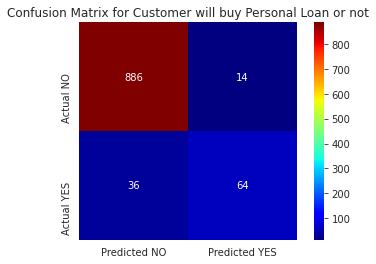

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

cm = confusion_matrix(y_test, y_pred_logis)
labels_1 = ['Predicted NO', 'Predicted YES']
labels_2 = ['Actual NO', 'Actual YES']
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix for Customer will buy Personal Loan or not")  

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import precision_score, recall_score
print (classification_report(y_test, y_pred_logis))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.82      0.64      0.72       100

    accuracy                           0.95      1000
   macro avg       0.89      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy Score :  0.95


In [ ]:
l_probs = [0 for _ in range(len(y_test))]
logis_probs = classifier_logis.predict_proba(X_test)
logis_probs = logis_probs[:, 1]
l_auc = roc_auc_score(y_test, l_probs)
logis_auc = roc_auc_score(y_test, logis_probs)
print('Logistic Regression: AUROC = %.3f' % (logis_auc))

Logistic Regression: AUROC = 0.952


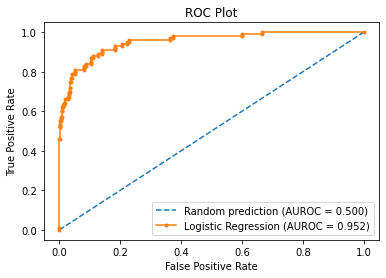

In [ ]:
l_fpr, l_tpr, _ = roc_curve(y_test, l_probs)
logis_fpr, logis_tpr, _ = roc_curve(y_test, logis_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(logis_fpr, logis_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logis_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_pred_logis,y_test)
print('Random Forest: Kappa Score = %.3f' % (kappa))

Random Forest: Kappa Score = 0.692


In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred_logis)

0.6985577239017595

***ANALYSIS***

Using Logistic Regression, got a AUROC (Area Under ROC curve) score of 0.952 and a Cohen Kappa score of 0.692. In this case recall is more important as false negatives are more important to minimize, but false positives are still important. The precision for class 1 is 0.82 and recall is 0.64. Here Cohen Kappa score has been used since, it is a imbalanced data, so it is better to evaluate the accuracy of the confusion matrix with Cohen Kappa score. Since Cohen Kappa score takes into account the possibility of giving a good score by chance or the model really has any merit. The Matthews Correlation Coefficient (MCC) also gave an accuracy of 0.698. So there is scope of further improvement. 

To improve the output of Logistic Regression further, SMOTE analysis can be used to make the dataset balanced one by oversampling it.

### **SMOTE Technique (Synthetic Minority Oversampling Technique)**

In [ ]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: 380 
Label 0, Before using SMOTE: 3620 


In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(ratio='auto', random_state=12)
X_train_os, y_train_os = os.fit_sample(X_train, y_train)

In [ ]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_os==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_os==0)))

Label 1, After using SMOTE: 3620
Label 0, After using SMOTE: 3620


In [ ]:
classifier_logis_sm = LogisticRegression(random_state = 0, solver='lbfgs')
classifier_logis_sm.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logis = classifier_logis_sm.predict(X_test)

**CONFUSION MATRIX**

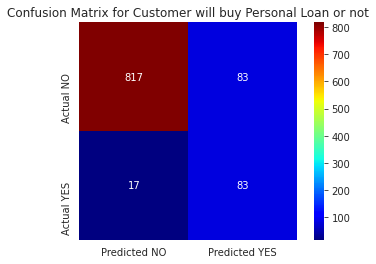

In [ ]:
cm = confusion_matrix(y_test, y_pred_logis)
labels_1 = ['Predicted NO', 'Predicted YES']
labels_2 = ['Actual NO', 'Actual YES']
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix for Customer will buy Personal Loan or not")

**MODEL EVALUATION**

In [ ]:
print (classification_report(y_test, y_pred_logis))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       900
           1       0.50      0.83      0.62       100

    accuracy                           0.90      1000
   macro avg       0.74      0.87      0.78      1000
weighted avg       0.93      0.90      0.91      1000

Accuracy Score :  0.9


In [ ]:
l_probs = [0 for _ in range(len(y_test))]
logis_probs = classifier_logis_sm.predict_proba(X_test)
logis_probs = logis_probs[:, 1]
l_auc = roc_auc_score(y_test, l_probs)
logis_auc = roc_auc_score(y_test, logis_probs)
print('Logistic Regression: AUROC = %.3f' % (logis_auc))

Logistic Regression: AUROC = 0.952


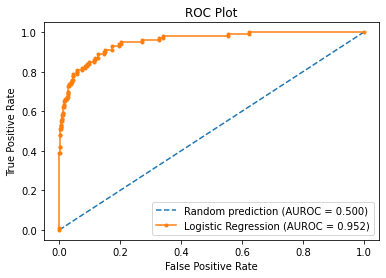

In [ ]:
l_fpr, l_tpr, _ = roc_curve(y_test, l_probs)
logis_fpr, logis_tpr, _ = roc_curve(y_test, logis_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(logis_fpr, logis_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logis_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
kappa = cohen_kappa_score(y_pred_logis,y_test)
print('Random Forest: Kappa Score = %.3f' % (kappa))

Random Forest: Kappa Score = 0.570


In [ ]:
matthews_corrcoef(y_test, y_pred_logis)

0.5948531357661558

***ANALYSIS***

Though the Recall has improved than before as it became 0.83, but the performance of the overall model didn't improved after using SMOTE technique on Logestic Regression. It rather degraded for Logistic Regression with SMOTE. The precision decreased to 0.5 and f1 score also decreased. So ensemble techniques can be used on the dataset. Random Forest Classifier model can be implemented with GridSearch to improve the model performance and if required SMOTE technique can be used.

## **RANDOM FOREST CLASSIFIER**

In [ ]:
param_grid = [{'max_depth': [10,20,30,40,50,80,100], 'max_features' : ['Auto', 'sqrt', '0.2'], 'min_samples_leaf' : [5,10,15,20,30,40,50,60],
               'n_estimators': [10,20,30,50,70,80,100]}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'max_depth': [10, 20, 30, 40, 50, 80, 100], 'max_features': ['Auto', 'sqrt', '0.2'], 'min_samples_leaf': [5, 10, 15, 20, 30, 40, 50, 60], 'n_estimators': [10, 20, 30, 50, 70, 80, 100]}]


**GRID SEARCH**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier_rf = RandomForestClassifier(random_state = 100)
grid_search = GridSearchCV(classifier_rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 30}
Best cross-validation score: 0.99


In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 30, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 5, random_state = 100)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

***ANALYSIS***

On doing GridSearchCV we got the best parameters that can be used to train the model, out of the parameters that has been passed as argument.
The best parameters are :

1. n_estimators = 30 (Total 30 decision trees will be used in the forest)

2. max_depth = 20 (The longest path between the root node and the leaf node is 20)

3. max_features = 'sqrt' (The number of maximum features provided to each tree in the random forest is the square root of the total number of features)

4. min_samples_leaf = 5 (The minimum number of samples that should be present in a node to be considered as a leaf node)

**CONFUSION MATRIX**

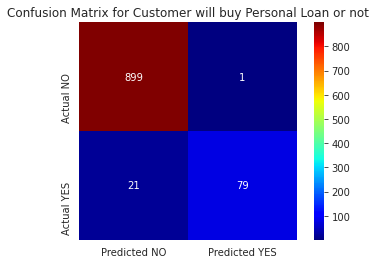

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
labels_1 = ['Predicted NO', 'Predicted YES']
labels_2 = ['Actual NO', 'Actual YES']
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix for Customer will buy Personal Loan or not")    

**MODEL EVALUATION**

In [ ]:
print (classification_report(y_test, y_pred_rf))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       0.99      0.79      0.88       100

    accuracy                           0.98      1000
   macro avg       0.98      0.89      0.93      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy Score :  0.978


In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = classifier_rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random Forest: AUROC = 0.996


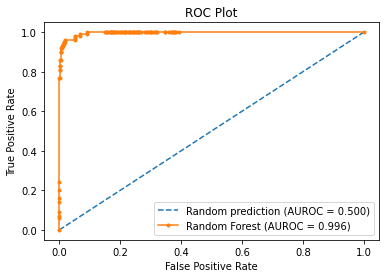

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
kappa = cohen_kappa_score(y_pred_rf,y_test)
print('Random Forest: Kappa Score = %.3f' % (kappa))

Random Forest: Kappa Score = 0.866


In [ ]:
matthews_corrcoef(y_test, y_pred_rf)

0.872364907249808

***ANALYSIS***

All the accuracy score has improved. The recall score has jumped to 0.79 and precision became 0.99 and f1 score 0.88. Even AUCROC score also increased to 0.996. Also Kappa Score and matthews score both increased significantly. Further using SMOTE technique just to check whether there is any improvement.

### **RANDOM FOREST CLASSIFIER with SMOTE ANALYSIS (Synthetic Minority Oversampling Technique)**

In [ ]:
classifier_rf_os = RandomForestClassifier(n_estimators = 30, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 5, random_state = 100)
classifier_rf_os.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = classifier_rf_os.predict(X_test)

**CONFUSION MATRIX**

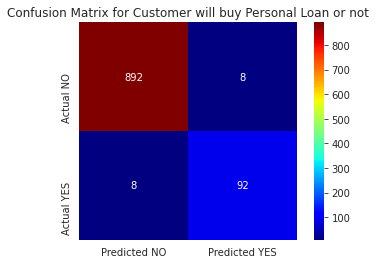

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
labels_1 = ['Predicted NO', 'Predicted YES']
labels_2 = ['Actual NO', 'Actual YES']
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix for Customer will buy Personal Loan or not")    

**MODEL EVALUATION**

In [ ]:
print (classification_report(y_test, y_pred_rf))
print("Accuracy Score : ", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.92      0.92      0.92       100

    accuracy                           0.98      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy Score :  0.984


In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = classifier_rf_os.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random Forest: AUROC = 0.995


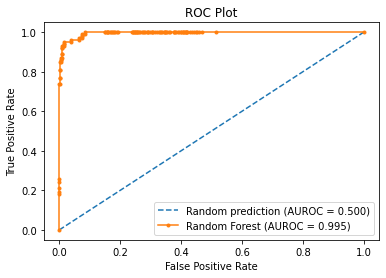

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
kappa = cohen_kappa_score(y_pred_rf,y_test)
print('Random Forest: Kappa Score = %.3f' % (kappa))

Random Forest: Kappa Score = 0.911


In [ ]:
matthews_corrcoef(y_test, y_pred_rf)

0.9111111111111111

***ANALYSIS***

Got the best result out of all the model. recall = precision = f1_score =0.92. Overall model accuracy also increased to 0.984 and AUCROC is same as that of the previous model. The Kappa score and matthews score we got is the best till now. So this model can be used to get the best result out of all the model.

# ---------------------------------------------------------THANKYOU---------------------------------------------------------
